In [13]:
pip install requests pandas matplotlib seaborn

  Using cached pandas-2.1.4-cp311-cp311-win_amd64.whl.metadata (18 kB)
  Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
  Using cached seaborn-0.13.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached numpy-1.26.2-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached contourpy-1.2.0-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.47.0-cp311-cp311-win_amd64.whl.metadata (160 kB)
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
  Using cached Pillow-10.1.0-cp311-cp311-win_amd64.whl.metadata (9.6 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
Using cached pandas-2.1.4-cp311-cp311-win_amd64.whl (10.6 MB)
Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl (7.6 MB)
Using cached seaborn-0.13.0-py

In [4]:
import requests
from spotipy.oauth2 import SpotifyClientCredentials
from config.config import SPOTIFY_CLIENT_ID
from config.config import SPOTIFY_CLIENT_SECRET

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import base64

In [22]:
from IPython.display import JSON

In [44]:
def get_access_token(client_id, client_secret):
    # Spotify API'ye yetkilendirme bilgilerini base64 ile kodla
    client_credentials = f"{client_id}:{client_secret}"
    client_credentials_b64 = base64.b64encode(client_credentials.encode()).decode()

    # Yetkilendirme isteği yap
    url = 'https://accounts.spotify.com/api/token'
    headers = {
        'Authorization': f'Basic {client_credentials_b64}',
        'Content-Type': 'application/x-www-form-urlencoded',
    }
    data = {'grant_type': 'client_credentials'}

    response = requests.post(url, headers=headers, data=data)
    access_token = response.json().get('access_token')

    return access_token

In [57]:
def get_artist_top_tracks(artist_id, access_token):
    url = f'https://api.spotify.com/v1/artists/{artist_id}/top-tracks?country=TR'
    headers = {'Authorization': f'Bearer {access_token}'}
    response = requests.get(url, headers=headers)
    return response.json()

In [58]:
client_id = 'your_client_id'
client_secret = 'your_client_secret'
access_token = get_access_token(SPOTIFY_CLIENT_ID,SPOTIFY_CLIENT_SECRET)


In [59]:
# Sanatçının Spotify kimliğini bulmak için arama yapmak:
artist_name = 'mor ve ötesi'
search_url = f'https://api.spotify.com/v1/search?q={artist_name}&type=artist'
search_response = requests.get(search_url, headers={'Authorization': f'Bearer {access_token}'})
artist_id = search_response.json()['artists']['items'][0]['id']

In [60]:
# Sanatçının popüler şarkılarını al
top_tracks_data = get_artist_top_tracks(artist_id, access_token)

In [61]:
# JSON formatında görüntüle
print(top_tracks_data)

{'tracks': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5ixQSDvAMa5O758xG8MWXT'}, 'href': 'https://api.spotify.com/v1/artists/5ixQSDvAMa5O758xG8MWXT', 'id': '5ixQSDvAMa5O758xG8MWXT', 'name': 'mor ve ötesi', 'type': 'artist', 'uri': 'spotify:artist:5ixQSDvAMa5O758xG8MWXT'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/0QbpgPjg5eOU5ltJ05r4V7'}, 'href': 'https://api.spotify.com/v1/albums/0QbpgPjg5eOU5ltJ05r4V7', 'id': '0QbpgPjg5eOU5ltJ05r4V7', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b27361cd6f5ad7c69b76adbc5419', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/ab67616d00001e0261cd6f5ad7c69b76adbc5419', 'width': 300}, {'height': 64, 'url': 'https://i.scdn.co/image/ab67616d0000485161cd6f5ad7c69b76adbc5419', 'width': 64}], 'is_playable': True, 'name': 'Dünya Yalan Söylüyor', 'release_date': '2004-04-16', 'release_date_precision': 'day', 'total_tracks': 10, 'type': '

In [50]:
JSON(top_tracks_data)

<IPython.core.display.JSON object>

In [62]:
# DataFrame oluştur
tracks_df = pd.DataFrame(columns=['Şarkı Adı', 'Popülerlik Oranı', 'Çıkış Yılı'])

for track in top_tracks_data['tracks']:
    track_name = track['name']
    popularity = track['popularity']
    release_year = track['album']['release_date'][:4]
    album_name= track['album']['name']

    
    track_data = {
        'Şarkı Adı': track_name,
        'Albüm Adı': album_name,
        'Popülerlik Oranı': popularity,
        'Çıkış Yılı': release_year
    }
    
    # DataFrame'e eklemek için concat kullan
    tracks_df = pd.concat([tracks_df, pd.DataFrame([track_data])], ignore_index=True)


In [63]:
tracks_df

,Şarkı Adı,Popülerlik Oranı,Çıkış Yılı,Albüm Adı
0,Bir Derdim Var,71,2004,Dünya Yalan Söylüyor
1,Cambaz,64,2004,Dünya Yalan Söylüyor
2,Oyunbozan,63,2012,Güneşi Beklerken
3,Daha Mutlu Olamam,62,2001,Gül Kendine
4,Deli,58,2008,Başıbozuk
5,Araf,57,2010,Masumiyetin Ziyan Olmaz
6,Küçük Sevgilim,55,2006,Büyük Düşler
7,Sevda Çiçeği,54,2004,Dünya Yalan Söylüyor
8,Aşk İçinde,54,2004,Dünya Yalan Söylüyor
9,Yaz Yaz Yaz,53,2016,Kayıtlar 2005-2016


In [64]:
print("Toplam Şarkı Sayısı:", len(tracks_df))
print("Ortalama Dinlenme Oranı:", tracks_df['Popülerlik Oranı'].mean())


Toplam Şarkı Sayısı: 10
Ortalama Dinlenme Oranı: 59.1


Tüm albümlerini çekelim

In [66]:
def get_artist_albums(artist_id, access_token):
    url = f'https://api.spotify.com/v1/artists/{artist_id}/albums'
    headers = {'Authorization': f'Bearer {access_token}'}
    artistalbum_response = requests.get(url, headers=headers)
    return  artistalbum_response.json()

def get_album_tracks(album_id, access_token):
    url = f'https://api.spotify.com/v1/albums/{album_id}/tracks'
    headers = {'Authorization': f'Bearer {access_token}'}
    albumtrack_response = requests.get(url, headers=headers)
    return albumtrack_response.json()


In [68]:
# Sanatçının Spotify kimliğini bulmak için arama yapabilirsiniz
artist_name = 'mor ve ötesi'
search_url = f'https://api.spotify.com/v1/search?q={artist_name}&type=artist'
search_response = requests.get(search_url, headers={'Authorization': f'Bearer {access_token}'})
artist_id = search_response.json()['artists']['items'][0]['id']

In [70]:
albumdata= get_artist_albums(artist_id,access_token)
JSON(albumdata)


<IPython.core.display.JSON object>

In [71]:
# DataFrame
albums_df = pd.DataFrame(columns=['Albüm Adı', 'Çıkış Tarihi', 'Şarkı Sayısı', 'Şarkı Listesi'])

In [76]:
# Her albüm için bilgileri çek ve DataFrame'e ekle
for album in albumdata['items']:
    album_name = album['name']
    release_date = album['release_date']
    total_tracks = album['total_tracks']
    album_id = album['id']

    # Albümdeki şarkıları al
    album_tracks_data = get_album_tracks(album_id, access_token)
    track_list = [track['name'] for track in album_tracks_data['items']]

    # DataFrame'e ekle
    albums_df = pd.concat([albums_df, pd.DataFrame({
        'Albüm Adı': [album_name],
        'Çıkış Tarihi': [release_date],
        'Şarkı Sayısı': [total_tracks],
        'Şarkı Listesi': [track_list]
    })], ignore_index=True)


In [77]:
albums_df

,Albüm Adı,Çıkış Tarihi,Şarkı Sayısı,Şarkı Listesi
0,Sirenler,2022-01-21,11,"[Adamın Dibi, Dünyaya Bedel, Linç, Canavar, Fo..."
1,Harbiye Açıkhava (Canlı Senfonik),2020-12-25,10,"[Aşk İçinde (Harbiye Açıkhava, 2019) - Canlı S..."
2,Canlı Senfonik - Aya İrini,2019-02-08,13,"[Oyunbozan - Canlı, Melekler Ölmez - Canlı, Gü..."
3,Kayıtlar 2005-2016,2016-12-20,44,"[Parti, Kördüğüm, Ayıp Olmaz Mı?, Şirket, Küçü..."
4,Diğer Kayıtlar,2016-12-20,9,"[Melekler Ölmez, Anlatamıyorum, Loveliest Mist..."
5,Güneşi Beklerken,2012-12-17,12,"[Güneşi Beklerken, Eski Şarkısı, Oyunbozan, Sa..."
6,Masumiyetin Ziyan Olmaz,2010-05-06,11,"[Korkma, Meksika, Sor, Yorma Kendini, Festus, ..."
7,Başıbozuk,2008-11-24,14,"[Deli, İddia, Sonbahar, Kış Geliyor - Canlı, R..."
8,Büyük Düşler,2006-05-05,12,"[Parti, Kördüğüm, Ayıp Olmaz Mı?, Şirket, Küçü..."
9,Dünya Yalan Söylüyor,2004-04-16,10,"[Yardım Et, Cambaz, Bir Derdim Var, Re, Sevda ..."


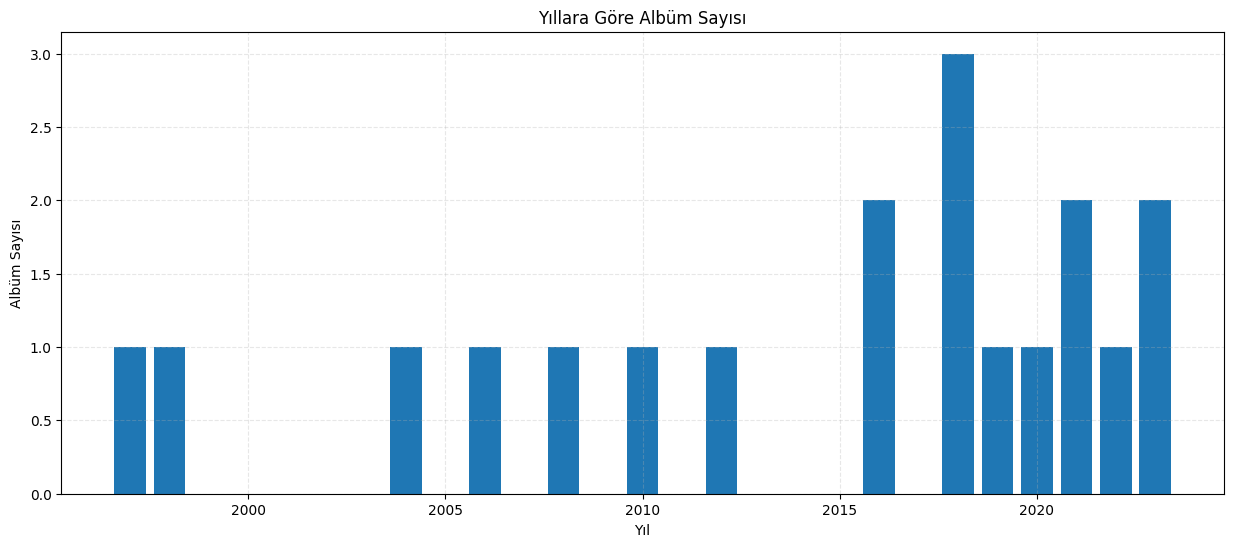

In [86]:
# 'Çıkış Tarihi' sütunundaki yıllar
albums_df['Çıkış Tarihi'] = pd.to_datetime(albums_df['Çıkış Tarihi'], errors='coerce')

# Yıl bilgisini içerenleri filtrele
year_only_filter = albums_df['Çıkış Tarihi'].dt.year == albums_df['Çıkış Tarihi'].dt.year
albums_df = albums_df[year_only_filter]

# Her yıl kaç tane albüm yayınlandığını hesapla
album_counts_by_year = albums_df['Çıkış Tarihi'].dt.year.value_counts().sort_index()

# Bar grafiği
plt.figure(figsize=(15, 6))
plt.bar(album_counts_by_year.index, album_counts_by_year.values)
plt.xlabel('Yıl')
plt.ylabel('Albüm Sayısı')
plt.title('Yıllara Göre Albüm Sayısı')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Her albümdeki ortalama şarkı sayısının yıllara göre değişimini gösteren bir çizgi grafiği

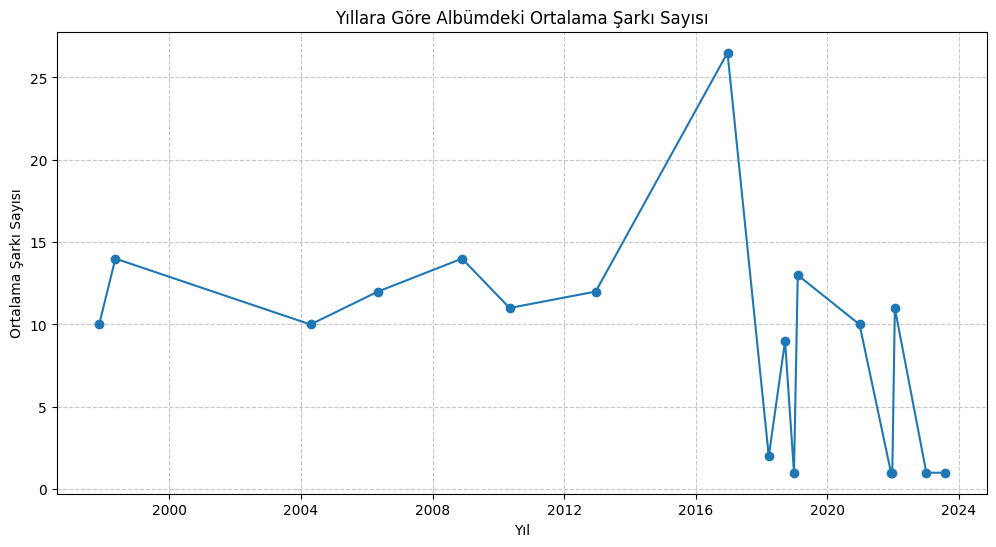

In [102]:
# Her albümdeki ortalama şarkı sayısını hesapla
albums_df['Şarkı Sayısı'] = albums_df['Şarkı Sayısı'].astype(int)
average_tracks_per_album = albums_df.groupby('Çıkış Tarihi')['Şarkı Sayısı'].mean()



# Çizgi grafiği oluştur
plt.figure(figsize=(12, 6))

plt.grid(True, linestyle='--', alpha=0.7)

plt.plot(average_tracks_per_album.index, average_tracks_per_album.values, marker='o')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Şarkı Sayısı')
plt.title('Yıllara Göre Albümdeki Ortalama Şarkı Sayısı')
plt.show()

En çok şarkı bulunan albümleri gösteren bir sütun grafiği 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Kayıtlar 2005-2016'),
  Text(1, 0, 'Bırak Zaman Aksın'),
  Text(2, 0, 'Başıbozuk'),
  Text(3, 0, 'Canlı Senfonik - Aya İrini'),
  Text(4, 0, 'Güneşi Beklerken'),
  Text(5, 0, 'Büyük Düşler'),
  Text(6, 0, 'Sirenler'),
  Text(7, 0, 'Masumiyetin Ziyan Olmaz'),
  Text(8, 0, 'Şehir'),
  Text(9, 0, 'Dünya Yalan Söylüyor')])

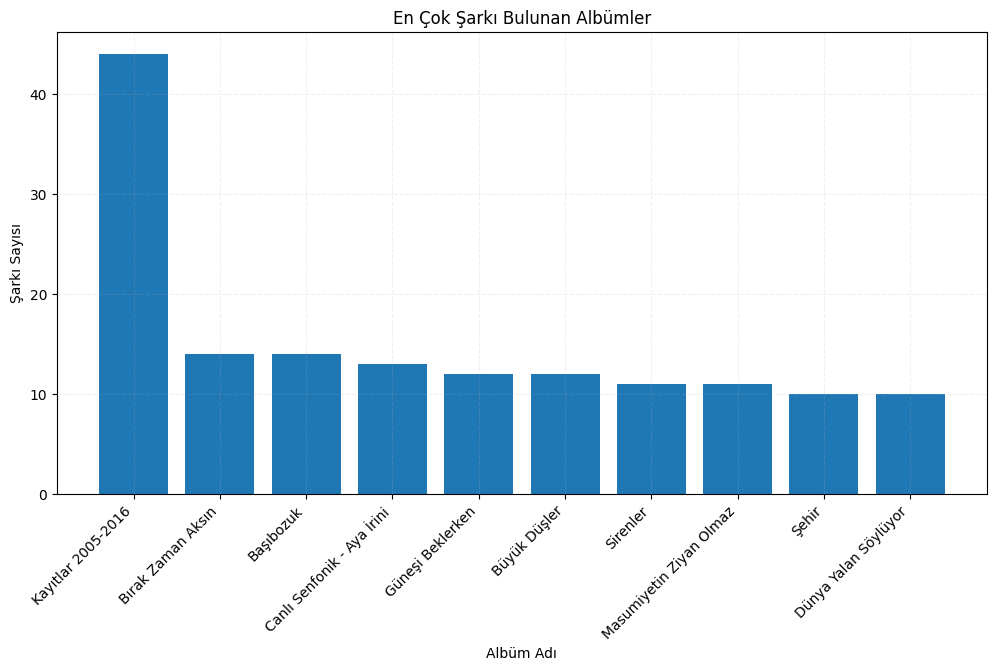

In [108]:
# En çok şarkı bulunan albümleri seç
top_albums_by_track_count = albums_df.sort_values(by='Şarkı Sayısı', ascending=False).head(10)

# Sütun grafiği oluştur
plt.figure(figsize=(12, 6))

plt.grid(True, linestyle='--', alpha=0.2)
plt.bar(top_albums_by_track_count['Albüm Adı'], top_albums_by_track_count['Şarkı Sayısı'])
plt.xlabel('Albüm Adı')
plt.ylabel('Şarkı Sayısı')
plt.title('En Çok Şarkı Bulunan Albümler')
plt.xticks(rotation=45, ha='right')

Buraya kadar Spotify ın resmi sitesinde HTTP GET İsteği ile veri çekme roadmap i olduğu için, o yolda veri çektik. Şimdi ise geliştiricilerin Python için oluşturduğu spotipy kütüphanesi ile devam edelim.

In [109]:
pip install spotipy

In [110]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

Belirli bir müzik türündeki popüler şarkıları veya kullanıcıya önerilen şarkıları

In [115]:
# Spotify API yetkilendirme
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=SPOTIFY_CLIENT_ID, client_secret=SPOTIFY_CLIENT_SECRET))

# Türkiye'deki popüler şarkıları çekme
turkey_top50_playlist_id = '37i9dQZEVXbIVYVBNw9D5K'  # Spotify Türkiye Top 50 listesi
results = sp.playlist_tracks(turkey_top50_playlist_id)

# Şarkı bilgilerini tutacak listeler oluştur
track_names = []
artists = []
popularity = []
release_years = []
album_names = []

# Her bir şarkı için bilgileri listelere ekle
for track in results['items']:
    track_names.append(track['track']['name'])
    artists.append(', '.join([artist['name'] for artist in track['track']['artists']]))
    popularity.append(track['track']['popularity'])
    release_years.append(track['track']['album']['release_date'][:4])
    album_names.append(track['track']['album']['name'])

# Listeleri kullanarak DataFrame oluştur
columns = ['Şarkı Adı', 'Sanatçı', 'Popülerlik', 'Çıkış Yılı', 'Albüm']
top_50_df = pd.DataFrame({
    'Şarkı Adı': track_names,
    'Sanatçı': artists,
    'Popülerlik': popularity,
    'Çıkış Yılı': release_years,
    'Albüm': album_names
})

# DataFrame'i göster
top_50_df

,Şarkı Adı,Sanatçı,Popülerlik,Çıkış Yılı,Albüm
0,Yansıma,"Derya Uluğ, Asil Gök",77,2023,Nefes
1,Salla Salla,BLOK3,77,2023,Salla Salla
2,Ağlama ben ağlarım,Canozan,79,2023,Ağlama ben ağlarım
3,Yüreğim Ağlar,Amo988,78,2023,Yüreğim Ağlar
4,MINI TERORISTA,Jeff Redd,76,2023,MINI TERORISTA
5,Ateşe Düştüm,Mert Demir,80,2023,Ateşe Düştüm
6,Yakışıklı,"KÖFN, Simge",75,2023,Yakışıklı
7,A La Carte,"Kleo, Segah, Motive",70,2023,A La Carte
8,Bertaraf,"Canbay & Wolker, Heijan, Muti",77,2023,SIR
9,İlle de Sen,"Muti, Azer Bülbül",78,2023,İlle de Sen


Popülerlik dağılım grafiği:

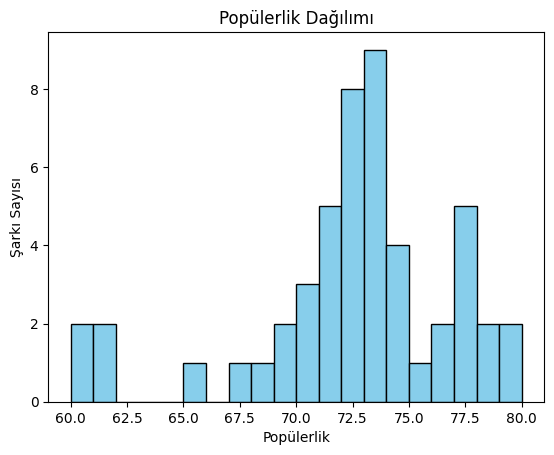

In [116]:
plt.hist(top_50_df['Popülerlik'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Popülerlik')
plt.ylabel('Şarkı Sayısı')
plt.title('Popülerlik Dağılımı')
plt.show()

Kaç farklı sanatçının bulunduğunu gösteren bir çubuk grafiği:

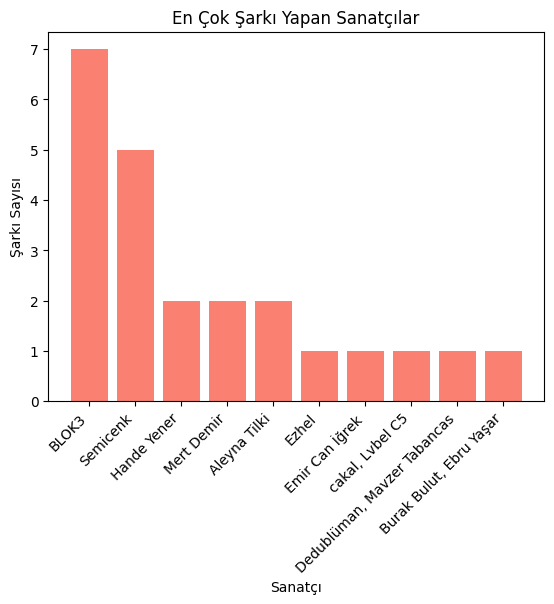

In [117]:
artist_counts = top_50_df['Sanatçı'].value_counts().sort_values(ascending=False).head(10)

plt.bar(artist_counts.index, artist_counts.values, color='salmon')
plt.xlabel('Sanatçı')
plt.ylabel('Şarkı Sayısı')
plt.title('En Çok Şarkı Yapan Sanatçılar')
plt.xticks(rotation=45, ha='right')
plt.show()

Her yıl yayınlanan şarkı sayısını gösteren grafik:

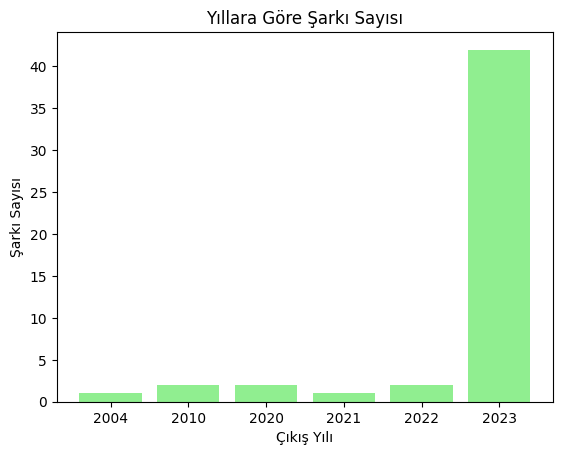

In [118]:
release_year_counts = tracks_data['Çıkış Yılı'].value_counts().sort_index()

plt.bar(release_year_counts.index, release_year_counts.values, color='lightgreen')
plt.xlabel('Çıkış Yılı')
plt.ylabel('Şarkı Sayısı')
plt.title('Yıllara Göre Şarkı Sayısı')
plt.show()

Seçilen bir sanatçının genel popülerliği, aylık dinlenme sayıları, takipçi sayısı gibi istatistikler

In [119]:
# Sanatçı adı
artist_name = 'mor ve ötesi'


# Sanatçıyı ara
results = sp.search(q=artist_name, type='artist')
artist = results['artists']['items'][0]

# Sanatçı istatistiklerini al
popularity = artist['popularity']
monthly_listeners = artist['followers']['total']
followers = artist['followers']['total']

# DataFrame oluştur
artist_data = pd.DataFrame({
    'Sanatçı': [artist_name],
    'Popülerlik': [popularity],
    'Aylık Dinleyici Sayısı': [monthly_listeners],
    'Takipçi Sayısı': [followers]
})


artist_data


,Sanatçı,Popülerlik,Aylık Dinleyici Sayısı,Takipçi Sayısı
0,mor ve ötesi,61,2200690,2200690


In [124]:
# Belirli bir türdeki popüler şarkıları çekme (örneğin, "pop" türü)
genre = 'pop'

# Türkiye'de popüler olan şarkıları çekme
results = sp.category_playlists(category_id=genre, country='TR', limit=10)

# Şarkı bilgilerini tutacak listeler oluştur
track_names = []
artists = []
popularity = []
release_years = []

# Her bir çalma listesindeki şarkıları al
for playlist in results['playlists']['items']:
    playlist_id = playlist['id']
    playlist_tracks = sp.playlist_tracks(playlist_id)
    for track in playlist_tracks['items']:
        track_names.append(track['track']['name'])
        artists.append(', '.join([artist['name'] for artist in track['track']['artists']]))
        popularity.append(track['track']['popularity'])
        release_years.append(track['track']['album']['release_date'][:4])

# Listeleri kullanarak DataFrame oluştur
columns = ['Şarkı Adı', 'Sanatçı', 'Popülerlik', 'Çıkış Yılı']
df = pd.DataFrame({
    'Şarkı Adı': track_names,
    'Sanatçı': artists,
    'Popülerlik': popularity,
    'Çıkış Yılı': release_years
})
df

,Şarkı Adı,Sanatçı,Popülerlik,Çıkış Yılı
0,Yansıma,"Derya Uluğ, Asil Gök",77,2023
1,Yüreğim Ağlar,Amo988,78,2023
2,Yakışıklı,"KÖFN, Simge",75,2023
3,Ayyaş,"EDIS, Baran Mengüç",65,2023
4,Bundan Böyle,Zeynep Bastık,62,2023
...,...,...,...,...
521,Cefalar,"Emrah Karaduman, Zeynep Bastık",35,2015
522,Ben Kalp Sen,"Murat Dalkılıç, Zeynep Bastık",28,2015
523,Yakışır Bana,Zeynep Bastık,35,2021
524,Delili Yok,"Grogi, Anıl Piyancı, Red, Zeynep Bastık",27,2012


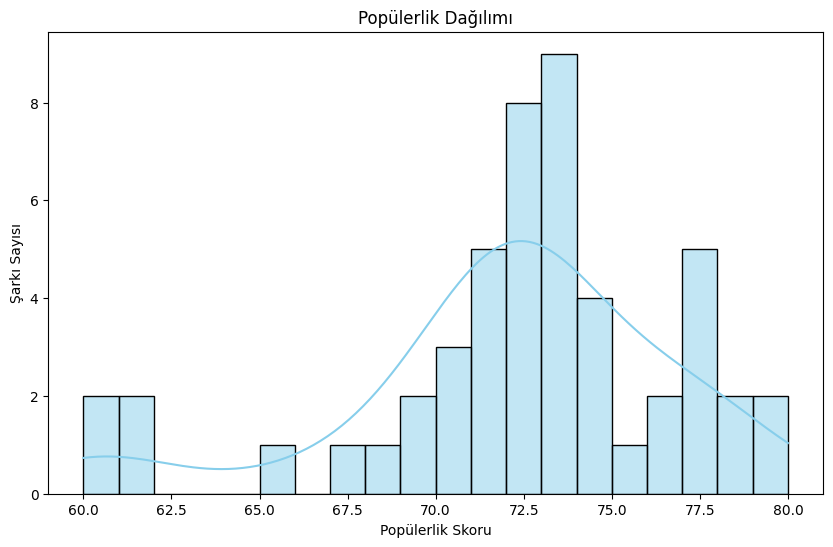

En Popüler Şarkı:
Şarkı Adı     Ateşe Düştüm
Sanatçı         Mert Demir
Popülerlik              80
Çıkış Yılı            2023
Albüm         Ateşe Düştüm
Name: 5, dtype: object

En Az Popüler Şarkı:
Şarkı Adı        Batık Gemi
Sanatçı            Semicenk
Popülerlik               60
Çıkış Yılı             2023
Albüm         Karışık Kaset
Name: 27, dtype: object


In [125]:
 #Popülerlik dağılımını görselleştirme
plt.figure(figsize=(10, 6))
sns.histplot(tracks_data['Popülerlik'], bins=20, kde=True, color='skyblue')
plt.title('Popülerlik Dağılımı')
plt.xlabel('Popülerlik Skoru')
plt.ylabel('Şarkı Sayısı')
plt.show()

# En popüler ve en az popüler şarkıları belirleme
most_popular_song = tracks_data.loc[tracks_data['Popülerlik'].idxmax()]
least_popular_song = tracks_data.loc[tracks_data['Popülerlik'].idxmin()]

print('En Popüler Şarkı:')
print(most_popular_song)

print('\nEn Az Popüler Şarkı:')
print(least_popular_song)

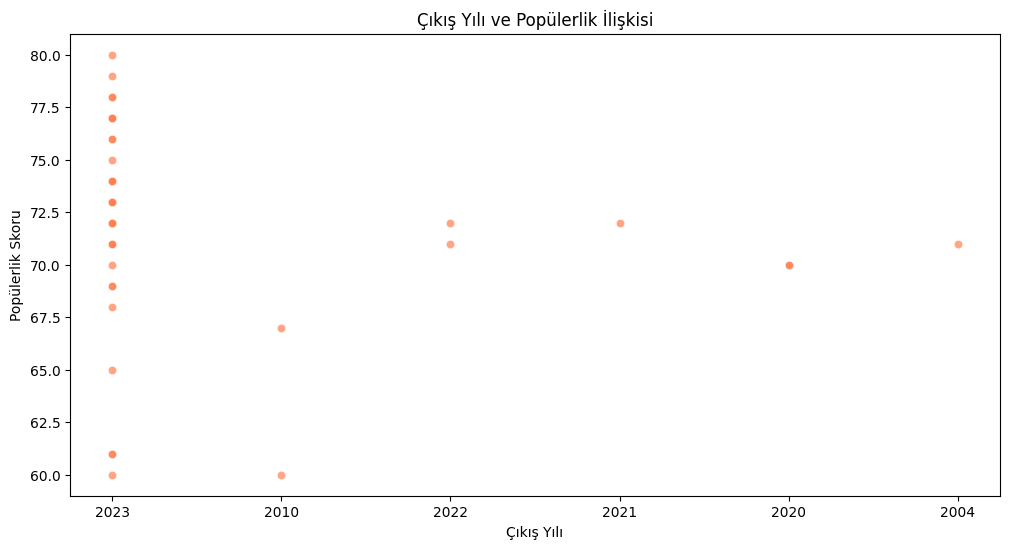

In [126]:
# Scatter plot ile çıkış yılları ve popülerlik ilişkisini görselleştirme
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Çıkış Yılı', y='Popülerlik', data=tracks_data, color='coral', alpha=0.7)
plt.title('Çıkış Yılı ve Popülerlik İlişkisi')
plt.xlabel('Çıkış Yılı')
plt.ylabel('Popülerlik Skoru')
plt.show()

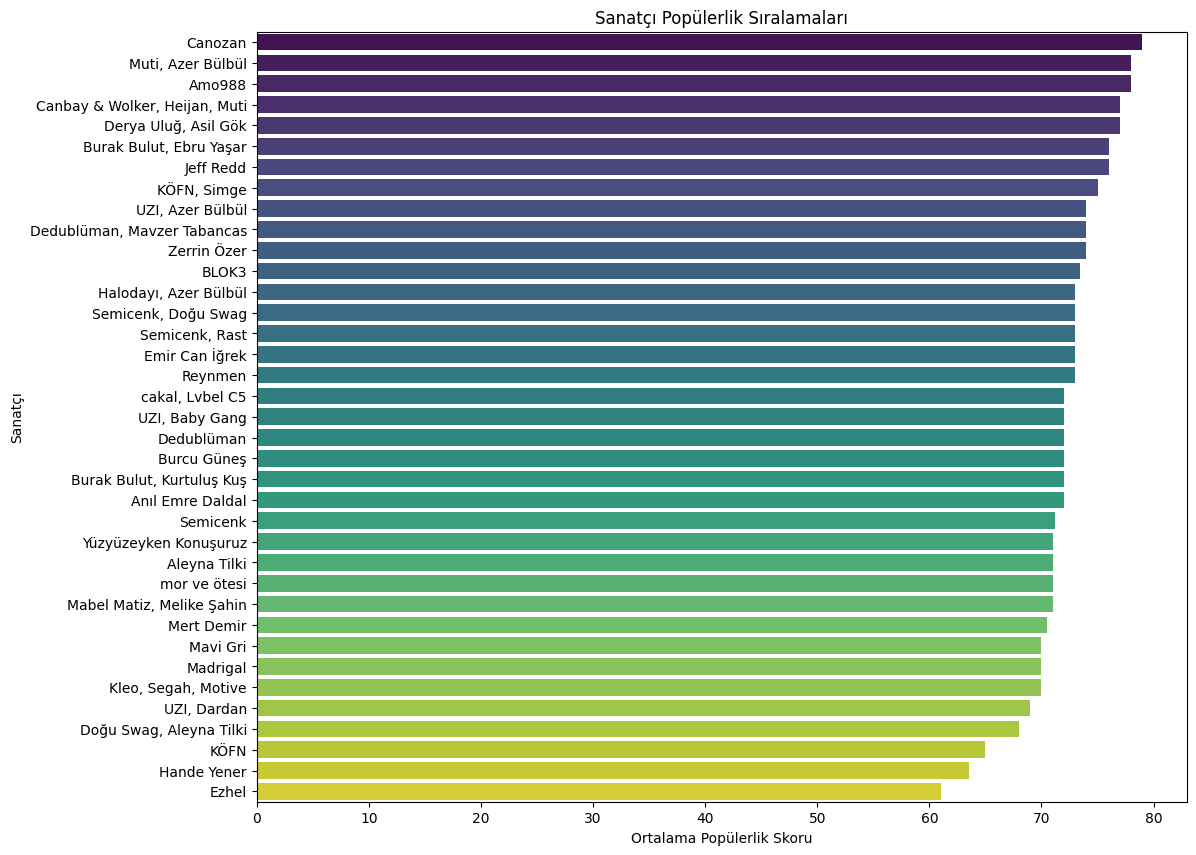

In [131]:
# Sanatçıların popülerlik sıralamalarını hesapla
artist_popularity = tracks_data.groupby('Sanatçı')['Popülerlik'].mean().sort_values(ascending=False)

# En popüler sanatçıları görselleştir
plt.figure(figsize=(12, 10))
sns.barplot(x=artist_popularity.values, y=artist_popularity.index, hue=artist_popularity.index, palette='viridis')
plt.title('Sanatçı Popülerlik Sıralamaları')
plt.xlabel('Ortalama Popülerlik Skoru')
plt.ylabel('Sanatçı')
plt.show()